# Project Aim

1. Create a database of all of my spotify playlists, by passing in my spotify user.
2. Cluster all songs in my playlist: using optimal features and correct number of groups.
3. Take an input of a song, tell me which playlist it should belong to. 
4. When I input a song, it tells me the song that is most like it in the playlist.

## Create Database of all Spoify Playlist Songs

In [1]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import sys
sys.path.insert(1, "C:/Users/jw156/Ironhack/Day26/Afternoon")
from config import *

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

#### Get all Spotify Playlists

In [30]:
# Get all spotify playlists and save to list called playlist_uri

In [73]:
def find_users_playlist(username):
    playlists = sp.user_playlists(username)
    playlist_uri = []
    while playlists:
        for i, playlist in enumerate(playlists['items']):
            playlist_uri.append(playlist['uri'])
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return playlist_uri

In [77]:
my_list = find_users_playlist('1170594511')

In [108]:
my_list

['spotify:playlist:331hVGsw9i5Ac3GR1f9z6X',
 'spotify:playlist:2xDrhBhEAKfZpMFP1zluHE',
 'spotify:playlist:0KcGhQeT0nfqA0OhKDAFYo',
 'spotify:playlist:7sgAA2PjYkJrQndifuUc2B',
 'spotify:playlist:4Y9XlMgVb4jl1p8dWwlcCd',
 'spotify:playlist:1wHNwupTm0eve8G8Qf6NcE',
 'spotify:playlist:355VY7wO182brJ6cleRpKV',
 'spotify:playlist:1nObPCYlBinVJIKhYaloDX']

In [33]:
# For all songs in the playlist, get every track and save to list

In [169]:
def get_audio_features_jonty(playlist_id):
    features_dict = {}
    for playlist in playlist_id:
        results = sp.user_playlist_tracks("1170594511",playlist)
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        for track in tracks:
            afeatures = sp.audio_features(track["track"]["uri"])
            features_dict[track['track']['name']] = afeatures
    return features_dict

In [170]:
# For all songs in the playlist, get every track's audio features, save it

In [171]:
all_audio = get_audio_features_jonty(my_list)

Expected id of type track but found type KARASIK+-+PEACEFUL+DREAMS+%28JAZZHOP+-+BLUES+%26+HIP+HOP%29+%28320++kbps%29 spotify:local:::KARASIK+-+PEACEFUL+DREAMS+%28JAZZHOP+-+BLUES+%26+HIP+HOP%29+%28320++kbps%29:121


In [204]:
df_tunes = pd.json_normalize(all_audio['Poor Boy'])
for song in all_audio.keys():
    try:
        x = pd.json_normalize(all_audio[song])
        df_tunes = pd.concat([df_tunes, x], ignore_index=True)
    except:
        x = None

In [209]:
#Reset the index on uri nad drop columns
df_tunes = df_tunes.set_index(['id'])
df_tunes = df_tunes.drop(['type', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis=1)

# Spotify audio features clustered

In [64]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [212]:
import pickle
import joblib

### Skaler

In [221]:
# Fit the scaler and save the scaler 

In [210]:
scaler = StandardScaler().fit(df_tunes)
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [213]:
# Fit the scaler to the dataframe

In [216]:
X_prep = StandardScaler().fit_transform(df_tunes)

In [219]:
#Check the dataframe

In [218]:
pd.DataFrame(X_prep, columns=df_tunes.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.437034,-0.568717,1.019322,-0.463959,0.852214,-0.690469,1.060832,0.657532,0.967625,0.683090,-0.882741,0.018035
1,-2.110645,1.613258,1.581756,1.627947,-1.173414,-0.495660,-1.215312,-0.612361,-0.509003,-1.211286,-1.229496,2.582133
2,-0.580741,1.767734,0.456888,0.089685,0.852214,-0.045165,-1.208309,-0.596158,-0.740549,1.081905,-0.464997,-0.808610
3,-1.922648,1.120865,1.019322,1.072123,-1.173414,-0.601182,-1.215508,-0.612685,1.341981,-1.227903,-0.858036,0.397095
4,0.203659,0.551235,-0.949197,-0.203902,0.852214,-0.580889,-0.280260,2.126849,-0.509003,-1.916691,0.104740,1.721860
...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0.715788,-1.466609,-1.511631,-2.246741,-1.173414,-0.093867,-0.879472,1.475926,-0.411947,1.734135,0.873492,1.174136
1560,0.437034,1.569811,1.019322,-0.257876,0.852214,-0.468265,-1.115035,0.685971,-0.961003,1.862920,0.009397,2.026479
1561,1.441844,0.802258,-0.386763,0.799526,-1.173414,-0.126335,-1.179712,-0.612440,-0.065321,1.260542,-0.285065,-0.323903
1562,0.968611,1.463609,-1.511631,1.070215,-1.173414,2.853632,-1.124229,-0.612533,0.704189,0.562614,0.456380,0.700457


### Clustering with K-Means

In [222]:
# Fit the K-means model

In [223]:
model = KMeans(n_clusters=4, random_state=1234)
model.fit(X_prep)

KMeans(n_clusters=4, random_state=1234)

In [224]:
# Save the model

In [225]:
joblib.dump(model, 'model.pkl')  
model_loaded = joblib.load('model.pkl')


In [226]:
clusters = model.predict(X_prep)
# print(clusters)
pd.Series(clusters).value_counts().sort_index()

0    270
1    470
2    633
3    191
dtype: int64

In [227]:
X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
# X_df['Song Name'] = names
# X_df= X_df.set_index('Song Name')
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,0.437034,-0.568717,1.019322,-0.463959,0.852214,-0.690469,1.060832,0.657532,0.967625,0.683090,-0.882741,0.018035,1
1,-2.110645,1.613258,1.581756,1.627947,-1.173414,-0.495660,-1.215312,-0.612361,-0.509003,-1.211286,-1.229496,2.582133,2
2,-0.580741,1.767734,0.456888,0.089685,0.852214,-0.045165,-1.208309,-0.596158,-0.740549,1.081905,-0.464997,-0.808610,2
3,-1.922648,1.120865,1.019322,1.072123,-1.173414,-0.601182,-1.215508,-0.612685,1.341981,-1.227903,-0.858036,0.397095,2
4,0.203659,0.551235,-0.949197,-0.203902,0.852214,-0.580889,-0.280260,2.126849,-0.509003,-1.916691,0.104740,1.721860,0


In [228]:
# Append cluster number to original dataframe

In [235]:
clusters = X_df['cluster'].tolist()

In [237]:
df_tunes['Cluster'] = clusters

### Choosing K 


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

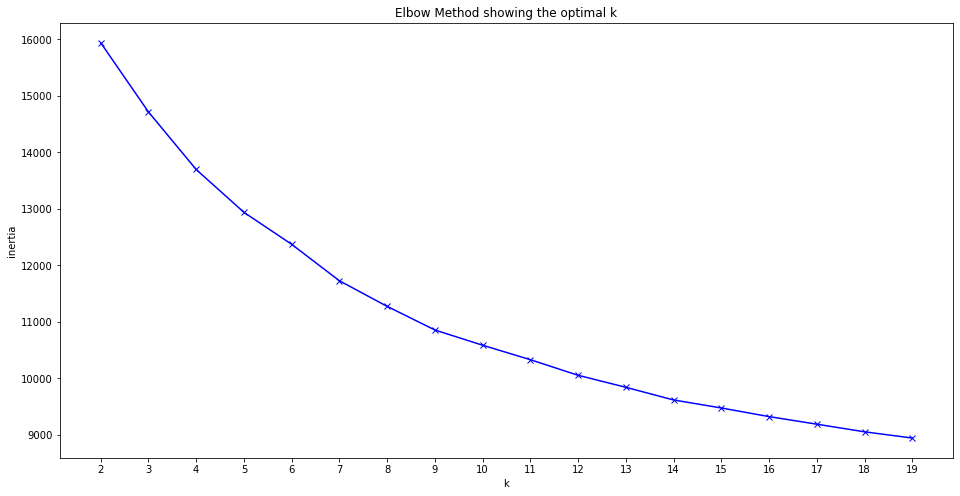

In [239]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

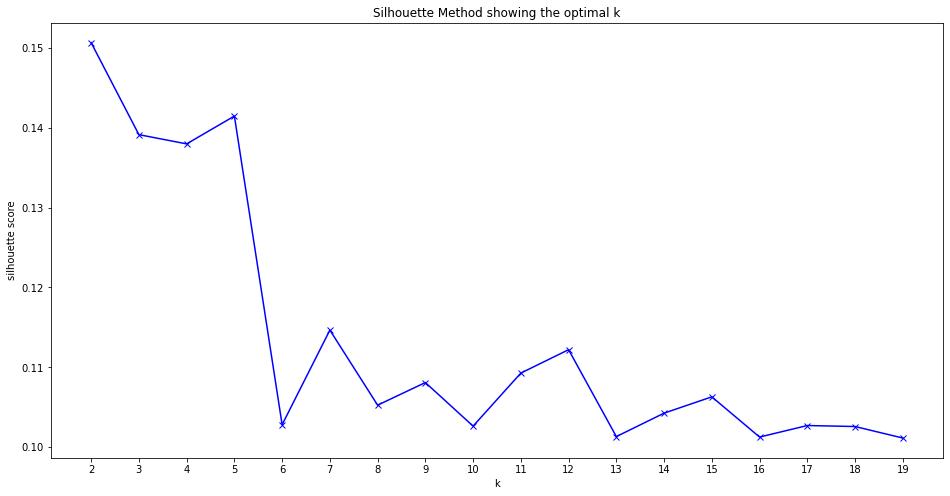

In [240]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

# Passing in Song and Predicting 


In [252]:
def get_song_features(song_name):
    results = sp.search(q=song_name, limit=50)
    for singer in range(len(results["tracks"]["items"])):
        x = input("By this artist? {} ".format(results['tracks']['items'][singer]['artists'][0]['name'])).lower()
        if x == 'yes':
            features_find = results['tracks']['items'][singer]['uri']
            song_features = sp.audio_features(features_find)
            tunes = song_features[0]
            drop_keys = ['type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'id']
            for key in drop_keys:
                if key in tunes.keys():
                    del tunes[key]
            break
        elif x != 'yes':
            continue
#     tunes['name'] = song_name
    return tunes


In [242]:
def scale_and_cluster(song):
    df = pd.DataFrame(song, index = [0])
    loaded_scaler = pickle.load(open('scaler.pickle', 'rb'))
    trans_song = loaded_scaler.transform(df)
    category = model_loaded.predict(trans_song)
    return category

In [263]:
def suggest_same_category_song(category):
    clust_num = int(category)
    sample_group = df_tunes.loc[df_tunes['Cluster']== clust_num]
    suggest_song = sample_group.sample().index
    results = sp.track(suggest_song[0])
    artist=results["artists"][0]["name"]
    song_name=results["name"]
    return song_name, artist


In [254]:
song = get_song_features('love')

By this artist? Taylor Swift yes


In [255]:
x = scale_and_cluster(song)

In [264]:
suggest_same_category_song(x)

('Come On Home', 'Lijadu Sisters')